# Examen parcial 1 (Python basico y visualizaciones)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 17.12.2021 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Cada de los dos ejercicios abajo vale 100%, 
* usted puede escojer cual ejercicio quiere hacer. 
* si hace dos ejercisios en la mitad tambien gana 100%
* si hace los dos ejercicios completos, extra puntos voy a pasar para resultado de proximo parcial

## Ejercicio 1a. Calcular una soma (Taylor aproximacion de funcion cos) usando loop 


$$cos(x)=\sum_{k=0}^{\infty}\frac{(-1)^k x^{2k}}{(2k)!}$$ 

1) usando loop for calcular valor de cos(0.2) para k=2 (en loop k=0,1,2)
* (puede comparar su resultado con $cos(x)=1 - \frac{x^2}{2!}  + \frac{x^4}{4!}$
* (para hacer factorial-! usa: import math, math.factorial)

2) crear una funcion cos_taylor(x,k) que acepta dos parametros x y k y vuelve valor de cos(x) para dado numero de termos k
* (intenta con x=0.2 y k=2 para comparar con resultado de punto 1)

3) crear un vector xvec que tiene 100 elementos en rango de $-\pi$: $\pi$ y usando loop for para cada elemento de este vector llama la funcion cos_taylor(x,k) y guarda resultados en una lista "cos_approx=[]" usando methodo append (cos_approx.append()). usa valor de k=3 
* (pista sobre loop: for x in xvec:...)

4) hacer visualizacion de dos curvas en mismo plot:
* xvec vs cos_approx (label: Taylor approximation)
* xvec vs np.cos(xvec) (label: cos(x))
* usa labels para cada curva

*la formula completa de approximacion
<table><tr>
<td> <img src="imgs/maclaurin_cos.png" width="400" /> </td>
</tr></table>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# PUNTO NÚMERO 1

cosx = 0
k = 2
x = 0.2

for i in range(k + 1):
  cosx = cosx + (((-1)**i)*(x**(2*i)))/(math.factorial(2*i))

print(cosx)

0.9800666666666666


In [3]:
# PUNTO NÚMERO 2

def cos_taylor(x, k):
  cos_x = 0
  for i in range(k + 1):
    cos_x = cos_x + (((-1)**i)*(x**(2*i)))/(math.factorial(2*i))

  return cos_x

# Comparamos con el resultado anterior
result = cos_taylor(0.2, 2)
print(result)


0.9800666666666666


In [4]:
# PUNTO NÚMERO 3

xvec = np.linspace(-np.pi, np.pi, 100)
cos_approx = []

for x in xvec:
  resultx = cos_taylor(x, 3)
  cos_approx.append(resultx)


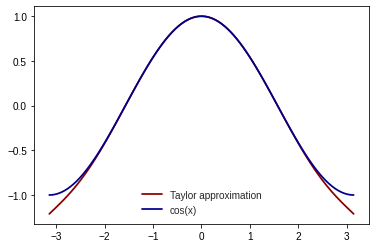

In [5]:
# PUNTO NÚMERO 4

fig, ax = plt.subplots()
plt.style.use("seaborn")
ax.plot(xvec, cos_approx, color = "darkred", label = "Taylor approximation")
ax.plot(xvec, np.cos(xvec), color = "darkblue", label = "cos(x)")
ax.legend()

## Ejercicio 1b. Visualizar imagenes de un conjunto de datos



#### Un documento 'images_32x32.mat' contiene ~ 25,000 de imagenes de digitos, images son en colores (cada imagen tiene 3 capas RGB) y cada imagen es 32x32 pixeles

1) convertir este conjunto de tipo MAT a un dicionario
* (import scipy.io,   
   imgs_dict = scipy.io.loadmat(images_32x32.mat)

2) muestra que llaves tiene este dicionario y muestra que dimensiones tienen las llaves **X** y **y**

3) visualiza aleatoriamente 10 de estos imagenes en una forma de matriz 1x10 (fila de 10 imagenes)
* los imagenes son guardados en llave 'X' de este dicionario

4) convertir las imágenes en color a escala de grises promediando una de las dimensiones y volver a mostrar las mismos 10 imagenes aleatorios en otra matriz de 1x10 (fila de 10 imagenes)

5) seria bien que los titulos de los 10 imagenes coresponden a etiquietas de llave "y"

In [6]:
!ls

examen_parcial_1_DavidVasquez.ipynb  images_32x32.mat


In [7]:
# PUNTOS NÚMERO 1 Y 2
import scipy.io
imgs_dict = scipy.io.loadmat("images_32x32.mat")

print(imgs_dict.keys())
print("")
print(imgs_dict["X"].shape)
print("")
print(imgs_dict["y"].shape)


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

(32, 32, 3, 26032)

(26032, 1)


/home/michal/.local/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


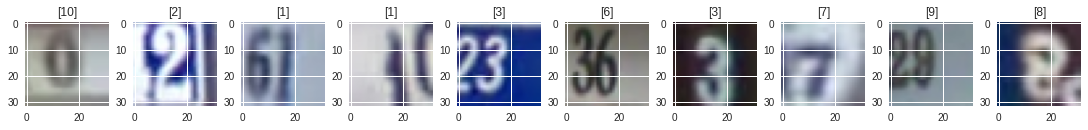

In [8]:
# PUNTO NÚMERO 3
xx = imgs_dict["X"].transpose((3,0,1,2))

random = np.arange(25000)
randoml = np.random.choice(random, 10)

imageL = []
title = []
for i in randoml:
  imageL.append(xx[i])
  title.append(imgs_dict["y"][i])

fig, ax = plt.subplots(1, 10, constrained_layout=True, figsize=(15,15))

contdr = 0
for i in range(10):
  ax[i].imshow(imageL[contdr])
  ax[i].set_title(title[contdr])
  contdr = contdr + 1


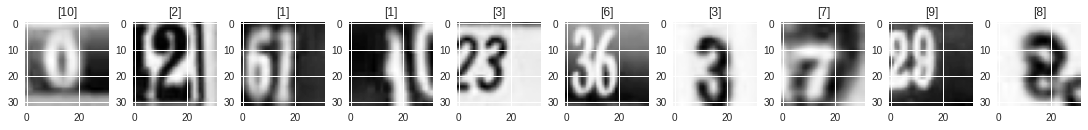

In [9]:
# PUNTO NÚMERO 4
fig, ax = plt.subplots(1, 10, constrained_layout=True, figsize=(15,15))

contdr = 0
for i in range(10):
  img_avg = np.average(imageL[contdr], -1)
  ax[i].imshow(img_avg)
  ax[i].set_title(title[contdr])
  contdr = contdr + 1

In [ ]:
# Comentarios:

# Exercise 1:
#   compilation (max: 2.5p):                     2.5p   
#   correctness of the result (max: 2.5p):       2.5p 
#   implementation of the function (max: 2.5p):  2.5p 
#   plot (max: 2.5p):                            2.5p 

# TOTAL:                                         10p (out of 10p)  

# Exercise 2:
#   compilation (max: 2.5p):                     2.5p   
#   loading the dictionary correctly (max. 0.5): 0.5p 
#   plotting randomly the images (max: 3.5p):    3.5p 
#   converting the images to GS (max: 2.5p):     3.5p 

# TOTAL:                                         10p (out of 10p)  
